# Projeto Final

## Parte 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

### Cria dataframe com apenas os atributos "category", "type" e "value"

In [4]:
df = pd.read_csv('./misp.csv', delimiter=',', nrows = None)
df.dataframeName = 'misp.csv'

df_chosen = df[['category', 'type', 'value']].copy()
df_chosen

,category,type,value
0,Network activity,url,http://api.holycrossservices.info/dri/donate.php
1,Network activity,ip-dst,176.103.56.36
2,Network activity,hostname,api.holycrossservices.info
3,Network activity,url,http://api.holycrossservices.net/dri/donate.php
4,Network activity,hostname,api.holycrossservices.org
...,...,...,...
138719,Network activity,domain,rimpro.ru
138720,Network activity,domain,techboss.net
138721,Network activity,domain,tommylam.com
138722,Network activity,domain,trudprom.ru


### Mapeia strings de categorias para indices inteiros

In [5]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['category'].unique()))))])
df_chosen['category_index'] = df['category'].map(d)
d

{'Antivirus detection': 1,
 'Artifacts dropped': 2,
 'Attribution': 3,
 'External analysis': 4,
 'Financial fraud': 5,
 'Internal reference': 6,
 'Network activity': 7,
 'Other': 8,
 'Payload delivery': 9,
 'Payload installation': 10,
 'Payload type': 11,
 'Persistence mechanism': 12,
 'Targeting data': 13}

### Mapeia string de tipos para indices inteiros

In [6]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['type'].unique()))))])
df_chosen['type_index'] = df['type'].map(d)
d

{'AS': 1,
 'attachment': 2,
 'btc': 3,
 'campaign-id': 4,
 'campaign-name': 5,
 'comment': 6,
 'domain': 7,
 'domain|ip': 8,
 'email-attachment': 9,
 'email-dst': 10,
 'email-src': 11,
 'email-subject': 12,
 'filename': 13,
 'filename|md5': 14,
 'filename|sha1': 15,
 'filename|sha256': 16,
 'hostname': 17,
 'imphash': 18,
 'ip-dst': 19,
 'ip-src': 20,
 'link': 21,
 'malware-sample': 22,
 'md5': 23,
 'mutex': 24,
 'named pipe': 25,
 'other': 26,
 'pattern-in-file': 27,
 'pattern-in-memory': 28,
 'pattern-in-traffic': 29,
 'pdb': 30,
 'pehash': 31,
 'prtn': 32,
 'regkey': 33,
 'regkey|value': 34,
 'sha1': 35,
 'sha256': 36,
 'snort': 37,
 'ssdeep': 38,
 'target-location': 39,
 'target-machine': 40,
 'target-org': 41,
 'target-user': 42,
 'text': 43,
 'threat-actor': 44,
 'uri': 45,
 'url': 46,
 'user-agent': 47,
 'vulnerability': 48,
 'whois-creation-date': 49,
 'whois-registrant-email': 50,
 'whois-registrant-name': 51,
 'whois-registrant-phone': 52,
 'whois-registrar': 53,
 'windows-sc

### Cria dataframe apenas com indices das categorias e dos tipos

In [7]:
df_selected = df_chosen[['category_index', 'type_index']].copy()
df_selected

,category_index,type_index
0,7,46
1,7,19
2,7,17
3,7,46
4,7,17
...,...,...
138719,7,7
138720,7,7
138721,7,7
138722,7,7


### Separa o dataset nas porções 80/20

In [8]:
df_shuffle = shuffle(df_selected, random_state=None).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

## Parte 2

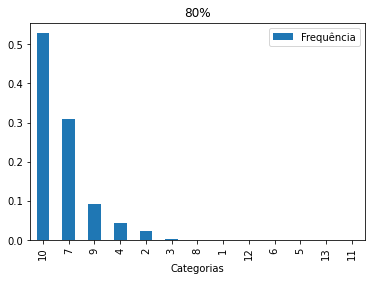

In [9]:
plot_df_80 = pd.DataFrame({
    'Categorias': df_80['category_index'].unique(),
    'Frequência': df_80['category_index'].value_counts(normalize=True)
})
plot_df_80.plot(x ='Categorias', y='Frequência', kind = 'bar', title='80%')

plt.show()

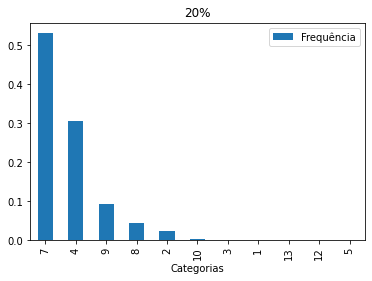

In [10]:
plot_df_20 = pd.DataFrame({
    'Categorias': df_20['category_index'].unique(),
    'Frequência': df_20['category_index'].value_counts(normalize=True)
})
plot_df_20.plot(x ='Categorias', y='Frequência', kind = 'bar', title='20%')

plt.show()

## Parte 3

## KNN

In [11]:
df_80['category_index'].value_counts()

7     58657
9     34414
4     10226
2      4742
10     2432
3       231
1       134
13       63
8        35
5        20
12       14
6        10
11        2
Name: category_index, dtype: int64

In [17]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import mean_squared_error

### Separando o conjunto de dados de treinamento e teste, sendo 80% para treino e 20% para teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2)

### Executando o KNN, o método predict tenta prever os valores para os dados de teste

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train, y_train)
resultado = knn.predict(X_test)
resultado

array([9, 7, 9, ..., 7, 7, 9], dtype=int64)

### Cria matriz de confusão

Exemplo: dos 27 valores que o modelo previu como sendo da categoria 1, todos os 27 foram classificados corretamente

In [20]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    2    3     4  5      7     9  12  13    All
Real                                                  
1          0   28     0  0      0     0   0   0     28
2         93    0     0  0      0   870   1   0    964
3          0   39     3  1      0     0   0   0     43
4          0   42  1669  0      7   398   0   0   2116
5          0    0     0  5      0     0   0   0      5
6          0    0     5  0      0     0   0   0      5
7          0    0     1  0  11758     1   0   0  11760
8          0    3     3  0      0     0   0   0      6
9         78    0     0  0      6  6672   0   0   6756
10         4    0     0  0      0   493   0   0    497
11         0    2     0  0      0     0   0   0      2
12         0    0     0  0      0     0   1   0      1
13         0    0     0  0      0     0   0  13     13
All      175  114  1681  6  11771  8434   2  13  22196


### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [21]:
mean_squared_error(y_test, resultado)

2.6033069021445305

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [22]:
model.score(X_test,y_test)

0.9123265453234817

## Random Forest

### Treinando o algoritmo e gerando o modelo

In [23]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=1)
tree_rf = RandomForestRegressor()

model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

### Matrizes de confusão

In [24]:
print (pd.crosstab(y_test,resultado_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  2.0  2.1369606259238334  3.0  3.129167239872593  3.217562482357284  \
Real                                                                          
1          0                   0    0                 29                  0   
2         12                  22    0                  0                  0   
3          0                   0   26                 20                  2   
4          0                   0    0                 45                  0   
5          0                   0    0                  0                  0   
7          0                   0    0                  1                  0   
8          0                   0    0                  1                  0   
9          0                   2    0                  1                  0   
10         0                   0    0                  1                  0   
12         0                   0    0                  0                  0   
13         0                   0    0               

### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [25]:
mean_squared_error(y_test, resultado_rf)

2.0476313613628836

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [26]:
model_rf.score(X_test,y_test)

0.3986661080825865

## Perceptron

In [27]:
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=30)
perc = Perceptron()

model_perc = perc.fit(X_train, y_train)
resultado_perc = model_perc.predict(X_test)
resultado_perc

array([12,  7, 12, ...,  7, 12,  7], dtype=int64)

### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [28]:
mean_squared_error(y_test, resultado_perc)

9.84506217336457

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [29]:
model_perc.score(X_test,y_test)

0.48481708415930796

In [30]:
print (pd.crosstab(y_test,resultado_perc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      7    12    All
Real                       
1            0    23     23
2          106   841    947
3            1    47     48
4         1617   423   2040
5            5     2      7
6            2     0      2
7        10760  1015  11775
8            6     9     15
9         1135  5702   6837
10           8   479    487
11           0     1      1
12           0     1      1
13           1    12     13
All      13641  8555  22196
